In [1]:
#Deep Learning Assignment: The Fashion Classifier (MLP Edition)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check shape before flattening
print("Before flattening:", X_train.shape)

# Normalize (0 - 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Check shape after flattening
print("After flattening:", X_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Before flattening: (60000, 28, 28)
After flattening: (60000, 784)


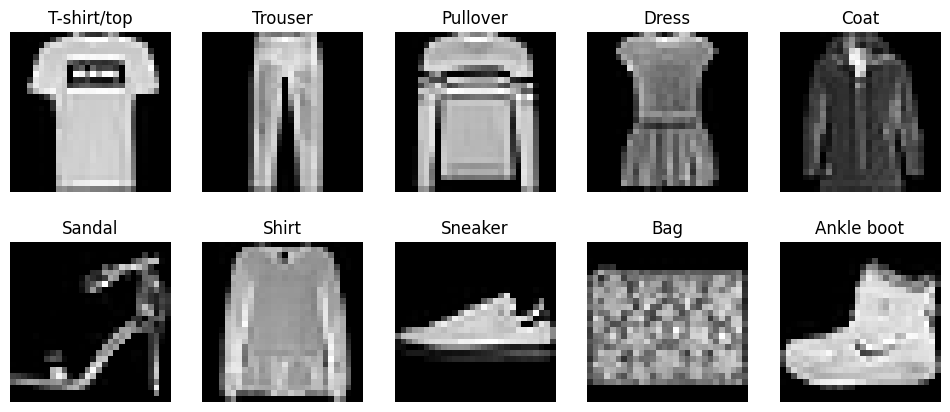

In [3]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(12,5))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()


In [5]:
#Task 1: Shallow Baseline Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [30]:
shallow_model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(784,)),
    Dense(10, activation='softmax')
])

shallow_model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [11]:
#train
history_shallow = shallow_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)




Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8201 - loss: 0.5256 - val_accuracy: 0.8207 - val_loss: 0.5142
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8288 - loss: 0.5044 - val_accuracy: 0.8232 - val_loss: 0.5039
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8311 - loss: 0.4943 - val_accuracy: 0.8249 - val_loss: 0.4969
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8311 - loss: 0.4906 - val_accuracy: 0.8258 - val_loss: 0.4874
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8343 - loss: 0.4794 - val_accuracy: 0.8280 - val_loss: 0.4805
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8367 - loss: 0.4738 - val_accuracy: 0.8307 - val_loss: 0.4743
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8364 - loss: 0.4655 - val_accuracy: 0.8318 - val_loss: 0.4682
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8360 - loss: 0.4705 - 

In [12]:
#evaluation

test_loss, test_acc = shallow_model.evaluate(X_test, y_test)
print("Shallow Model Test Accuracy:", test_acc)




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.4731
Shallow Model Test Accuracy: 0.8274999856948853


In [25]:
#Task 2: Deep & Wide Model

deep_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

deep_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#train
history_deep = deep_model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7758 - loss: 0.6211 - val_accuracy: 0.8542 - val_loss: 0.4018
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8636 - loss: 0.3751 - val_accuracy: 0.8685 - val_loss: 0.3718
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8709 - loss: 0.3399 - val_accuracy: 0.8658 - val_loss: 0.3954
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8844 - loss: 0.3127 - val_accuracy: 0.8794 - val_loss: 0.3330
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8905 - loss: 0.2904 - val_accuracy: 0.8746 - val_loss: 0.3545
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8977 - loss: 0.2705 - val_accuracy: 0.8802 - val_loss: 0.3307
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9048 - loss: 0.2561 - val_accuracy: 0.8834 - val_loss: 0.3400
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9024 -

In [15]:
#evaluation
test_loss, test_acc = deep_model.evaluate(X_test, y_test)
print("Deep Model Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8925 - loss: 0.3938
Deep Model Test Accuracy: 0.8913999795913696


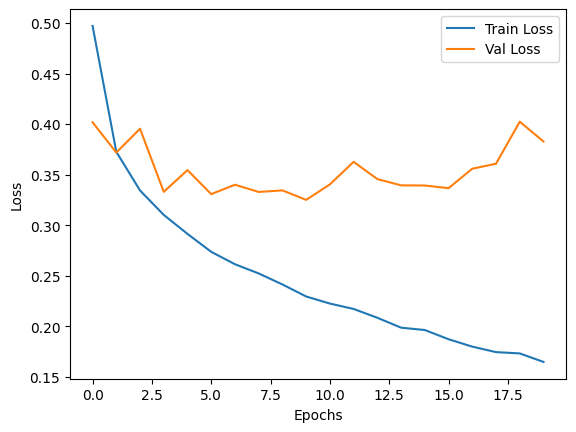

In [16]:
#Task 3: Fighting Overfitting

plt.plot(history_deep.history['loss'], label='Train Loss')
plt.plot(history_deep.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [27]:
regularized_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

regularized_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [19]:
#train
history_reg = regularized_model.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7090 - loss: 0.8071 - val_accuracy: 0.8488 - val_loss: 0.4164
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8320 - loss: 0.4692 - val_accuracy: 0.8594 - val_loss: 0.3851
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8473 - loss: 0.4234 - val_accuracy: 0.8662 - val_loss: 0.3635
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8571 - loss: 0.4002 - val_accuracy: 0.8670 - val_loss: 0.3661
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8608 - loss: 0.3881 - val_accuracy: 0.8710 - val_loss: 0.3567
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8627 - loss: 0.3771 - val_accuracy: 0.8762 - val_loss: 0.3509
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8694 - loss: 0.3629 - val_accuracy: 0.8779 - val_loss: 0.3343
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8748 -

In [20]:
#Task 4: Forensic Analysis
from sklearn.metrics import confusion_matrix


In [21]:
y_pred = np.argmax(regularized_model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


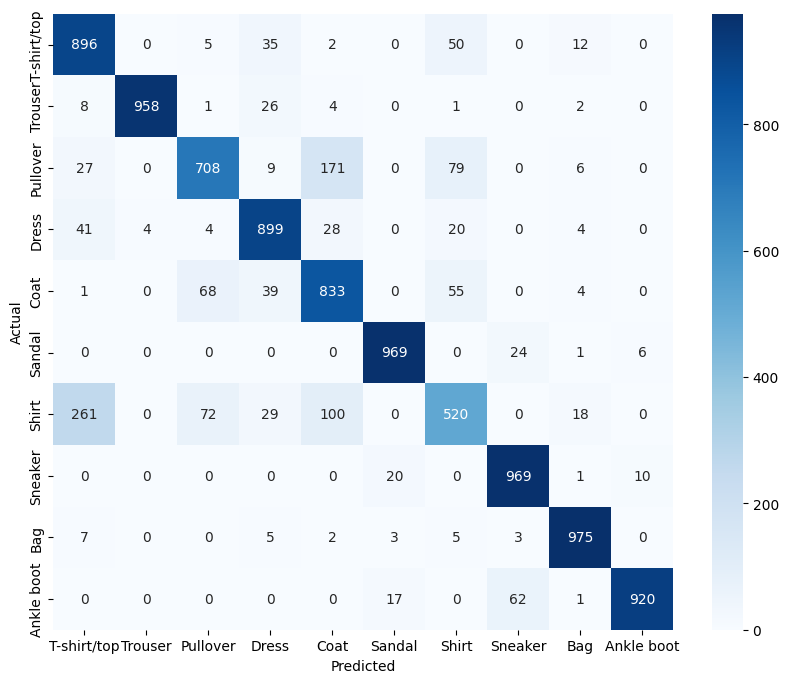

In [22]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


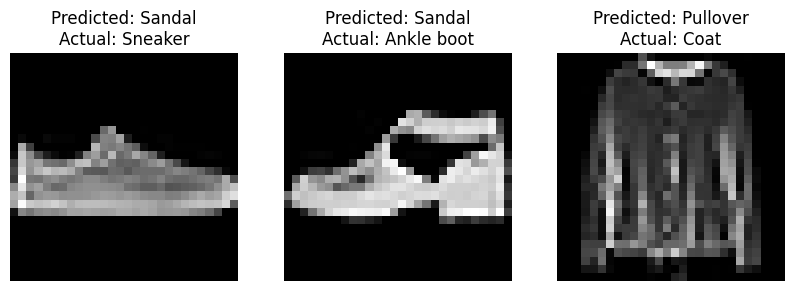

In [23]:
#Displaying images that are incorrectly categorized

misclassified = np.where(y_test != y_pred)[0][:3]

plt.figure(figsize=(10,3))
for i, idx in enumerate(misclassified):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {class_names[y_pred[idx]]}\nActual: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()


In [24]:
#Bonus: Batch Size Experiment
# Batch Size = 32
regularized_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Batch Size = 1024
regularized_model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8711 - loss: 0.3559 - val_accuracy: 0.8737 - val_loss: 0.3406
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8790 - loss: 0.3352 - val_accuracy: 0.8783 - val_loss: 0.3491
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8798 - loss: 0.3312 - val_accuracy: 0.8832 - val_loss: 0.3285
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8810 - loss: 0.3262 - val_accuracy: 0.8784 - val_loss: 0.3484
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8841 - loss: 0.3210 - val_accuracy: 0.8853 - val_loss: 0.3289
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8843 - loss: 0.3192 - val_accuracy: 0.8857 - val_loss: 0.3292
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8879 - loss: 0.3134 - val_accuracy: 0.8802 - val_loss: 0.3354
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8867 -